# MARQUER Matthieu
## Projet 3: Anticipez les besoins en consommation de bâtiments
## Suite pour "TotalGHGEmissions":
![alt text](img/15510245026714_Seattle_logo_landscape_blue-black.png "Seattle")


### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

### Modification des options

In [2]:
# https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
pd.set_option("display.max_rows", 200)
#pd.set_option("display.max_colwidth", 500)
pd.set_option('display.max_columns', 46)

### Importation des fichiers excel

In [3]:
# Import csv
building = pd.read_csv('data/cleaned/building.csv') 

### 1.0 - Vue global

In [4]:
building.head(2)

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),NumberofBuildings,TotalGHGEmissions,LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,...,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility,Energy,GHG
0,1,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,0.153728,-0.032343,0.659251,0.078043,-0.145911,0.044886,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,0.290019,-0.032343,0.891757,0.038137,-0.111143,0.023891,1.929597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [5]:
# Copie du DataFrame
data = building.copy()
# Suppression variable: ENERGYSTARScore
data = data.drop(columns=["ENERGYSTARScore"])

## Prediction de "TotalGHGEmissions"
### Train Test Split:

In [6]:
# Récupération des valeurs
X = data.drop(columns=["OSEBuildingID","SiteEnergyUse(kBtu)", "TotalGHGEmissions"]) # ENERGYSTARScore
y = data['TotalGHGEmissions'].values

In [7]:
X

,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,NumberofBuildings,LargestPropertyUseTypeGFA,Surface_total,Ratio_GFA_PK,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,...,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility,Energy,GHG
0,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,-0.032343,0.078043,0.044886,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,-0.032343,0.038137,0.023891,1.929597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,-0.123398,-0.201131,-0.329563,0.968955,-1.041999,-0.061489,-0.032343,-0.159556,-0.062379,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,-0.290155,0.207937,1.187954,2.282362,0.594644,-0.069424,-0.032343,0.384844,0.280297,0.394455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,-0.120350,-0.210759,0.580898,-0.344452,1.170499,-0.016239,-0.032343,0.081513,-0.180421,0.312242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,-2.545942,-0.549654,-0.329563,-0.508628,-1.496621,1.200173,-0.032343,-0.620840,-0.205174,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1389,-1.847567,-0.581167,-0.329563,-0.508628,0.352178,1.294320,-0.032343,-0.601281,-0.206138,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1390,-1.767889,-0.538178,-0.329563,-0.508628,0.655260,-1.636690,-0.032343,-0.536882,-0.204823,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1391,0.413446,-0.570741,-0.329563,-0.508628,0.867417,-1.901547,-0.032343,-0.639058,-0.205819,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [8]:
y

array([ 0.65925092,  0.89175673,  0.84396837, ..., -0.50454503,
       -0.49552454, -0.39842752])

In [9]:
from sklearn import model_selection
bins = pd.qcut(data['TotalGHGEmissions'], 10)
X_train, X_test, y_train, y_test  = \
    model_selection.train_test_split(X, y, test_size=0.3, stratify=bins, random_state=42)

In [10]:
# Standardisation

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

### Modèles avec recherche des meilleurs paramètres pour "TotalGHGEmissions"

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lien:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# https://xgboost.readthedocs.io/en/stable/python/python_api.html

# Paramètres
alpha_lasso = np.logspace(-3, 3, 50)
alpha_rigde = [14.00, 14.001, 14.00292]#np.logspace(np.log10(14), np.log10(14.09), 20) = R:0.3965177623957743
alpha_elast = np.logspace(np.log10(0.0093), np.log10(0.0098), 20)
l1_elast = np.logspace(np.log10(0.10), np.log10(0.101), 5)
reg_alpha = np.logspace(np.log10(0.25), np.log10(0.30), 5)
reg_lambda = np.logspace(np.log10(1.2), np.log10(1.6), 5)
# max_iter = np.logspace(50, 150, 20, int)

# Liste des modèles:
models = [
    ('DummyRegressor', DummyRegressor(strategy="median"), {}), #"mean"
    
    ('LinearRegression', LinearRegression(), {}),
  
    ('Lasso', Lasso(), {'alpha': alpha_lasso,
                        'max_iter': [61, 62, 63] # max_iter
                       }),
    
    ('Ridge', Ridge(), {'alpha': alpha_rigde, 
                        'max_iter': [1, 2, 3]
                       }),
    
    ('ElasticNet', ElasticNet(), {'alpha': alpha_elast, # alpha_elast
                                  'l1_ratio': l1_elast, #l1_elast
                                  'max_iter': [25, 50, 100]
                                 }),
    
    ('DecisionTreeRegressor', DecisionTreeRegressor(), {#'criterion': ['absolute_error'],#'squared_error', 'friedman_mse', 'absolute_error'
                                                        'max_depth': [4],# fixer pour limiter calcul sinon: [4, 5, 6]
                                                        'min_samples_split': [1, 2, 3],
                                                        'min_samples_leaf': [5,6,7],
                                                        'random_state': [42]
                                                       }),
    
    
    ('RandomForestRegressor', RandomForestRegressor(), {'n_estimators': [90], 
                                                        #'max_depth': [8], 
                                                        'min_samples_split': [6,7,8],
                                                        'min_samples_leaf': [1, 2, 4],
                                                        #'max_features': ['sqrt', 'log2', None], 
                                                        'random_state': [42]
                                                       }),
    ('XGBRegressor', XGBRegressor(), {'n_estimators': [50], 
                                      #'max_depth': [1, 2, 3], # pas au dessus de 5 
                                      'learning_rate': [0.094, 0.095, 0.0951], 
                                      'reg_lambda': reg_lambda, 
                                      #'reg_alpha': reg_alpha, 
                                      'random_state': [42]
                                     }), 
]
# GridSearchCV sur les modèles:
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    print(f"{name}:")
    print("Meilleur Paramètres:", grid.best_params_)
    print("R² Score sur Train (CV):", grid.best_score_) # best_model_.score_
    print("R² Score sur Test:", grid.best_estimator_.score(X_test, y_test))
    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.2f}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {mae:.2f}")
    print()

DummyRegressor:
Meilleur Paramètres: {}
R² Score sur Train (CV): -0.14093960063678837
R² Score sur Test: -0.13981889152003557
RMSE: 1.04
MAE: 0.50

LinearRegression:
Meilleur Paramètres: {}
R² Score sur Train (CV): -3.138521434802361e+23
R² Score sur Test: -134886047540599.64
RMSE: 11295499.16
MAE: 553078.52

Lasso:
Meilleur Paramètres: {'alpha': 0.0071968567300115215, 'max_iter': 63}
R² Score sur Train (CV): 0.536092269431108
R² Score sur Test: 0.5948160431193417
RMSE: 0.62
MAE: 0.38

Ridge:
Meilleur Paramètres: {'alpha': 14.00292, 'max_iter': 1}
R² Score sur Train (CV): 0.5417392181698929
R² Score sur Test: 0.6021433860607002
RMSE: 0.61
MAE: 0.38

ElasticNet:
Meilleur Paramètres: {'alpha': 0.009799999999999996, 'l1_ratio': 0.10100000000000002, 'max_iter': 100}
R² Score sur Train (CV): 0.538227326437152
R² Score sur Test: 0.6045630675067886
RMSE: 0.61
MAE: 0.38

DecisionTreeRegressor:
Meilleur Paramètres: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 

In [12]:
# Coefficients de LinearRegression, Lasso, Ridge et ElasticNet
for name, model, params in models:
    if name in ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet']:
        model.fit(X_train, y_train)  
        coefficients = model.coef_  
        print(f" \n Coefficients pour {name}: \n {coefficients}")

 
 Coefficients pour LinearRegression: 
 [ 5.80903800e-02  2.34688871e-01 -1.82841115e-02  7.19972648e-02
  2.50884459e-02  2.16681759e-02 -3.45086552e-02  4.27251386e-01
 -3.03324372e-01  9.55454710e-03  2.82647481e+11 -3.89038472e+11
  2.82647481e+11  2.46934293e+11  2.82647481e+11  2.82647481e+11
  2.82647481e+11  2.82647481e+11  2.82647481e+11  2.82647481e+11
  2.47565866e+10  2.82647481e+11  2.82647481e+11  2.82647481e+11
  1.05981372e+11  7.74355793e+10  2.82647481e+11  2.82647481e+11
  7.94291974e+10  2.82647481e+11 -9.82133129e+11  3.45585901e+11
  3.45585901e+11  3.45585901e+11  3.45585901e+11  3.45585901e+11
  3.45585901e+11  3.45585901e+11  3.45585901e+11  3.45585901e+11
  3.45585901e+11  3.45585901e+11  3.45585901e+11  3.45585901e+11
  3.45585901e+11  3.45585901e+11  3.45585901e+11  3.45585901e+11
  3.45585901e+11  3.45585901e+11 -5.41880109e-01 -3.14638654e-03
  2.03218284e+11  2.42124084e+00 -2.69723616e-01 -3.12095379e-01
 -1.46899691e-01 -2.30936891e+08  1.26203090e-01 

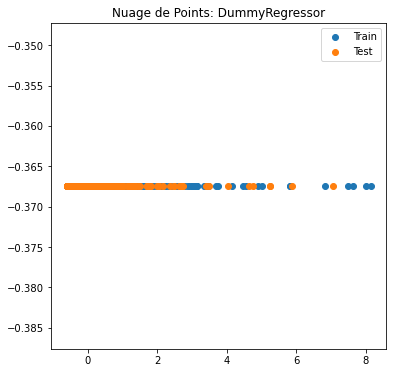

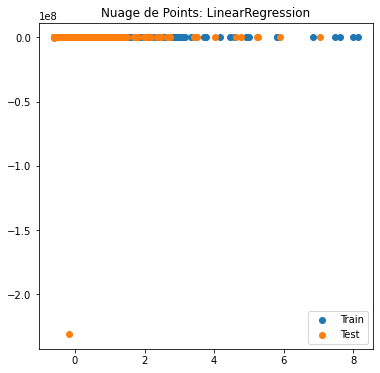

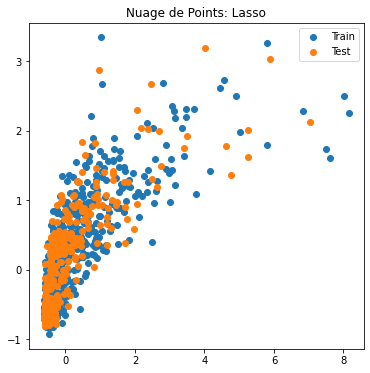

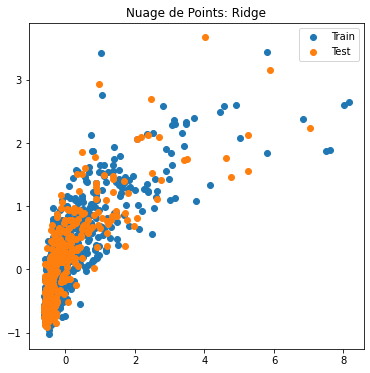

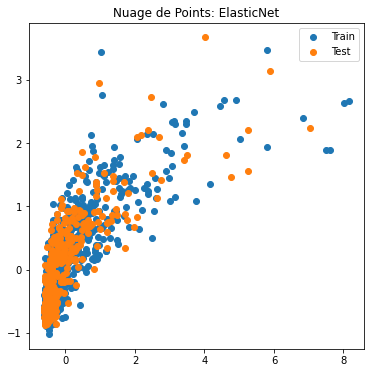

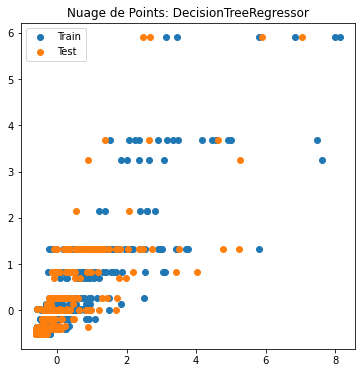

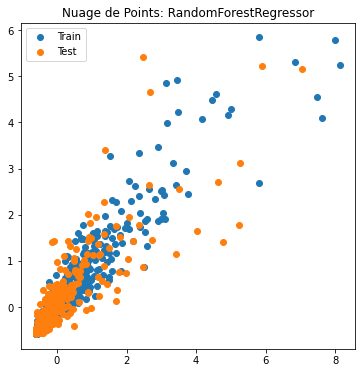

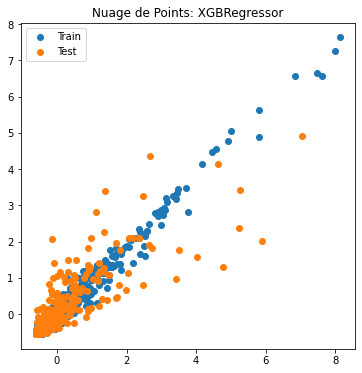

In [13]:
# GridSearchCV sur les modèles:
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)

    # Prediction sur train et test
    y_pred_train = grid.predict(X_train)
    y_pred_test = grid.predict(X_test)
   
    # Nuage de point
    plt.figure(figsize=(6, 6))
    plt.scatter(y_train, y_pred_train, label='Train')
    plt.scatter(y_test, y_pred_test, label='Test')
    plt.title(f"Nuage de Points: {name}")
    plt.legend()
    plt.show()

### Résultat des modeles

In [14]:
# Liste des résultats
resultat_mod = []

# GridSearchCV sur les modèles
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)

    # Prédiction
    y_pred = grid.predict(X_test)

    # Calcul du RMSE (racine de l'erreur quadratique moyenne)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calcul du MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)

    # Calcul du R²
    r2 = r2_score(y_test, y_pred)

    # Ajoute les résultats au dictionnaire
    resultat_mod.append({
        'Model': name,
        'RMSE': "{:.2f}".format(rmse),
        'MAE': "{:.2f}".format(mae),
        'R²': "{:.2f}".format(r2)
    })

# Transformation de la liste en DataFrame
comparateur_model = pd.DataFrame(resultat_mod)
comparateur_model

,Model,RMSE,MAE,R²
0,DummyRegressor,1.04,0.50,-0.14
1,LinearRegression,11295499.16,553078.52,-134886047540599.64
2,Lasso,0.62,0.38,0.59
3,Ridge,0.61,0.38,0.60
4,ElasticNet,0.61,0.38,0.60
5,DecisionTreeRegressor,0.59,0.29,0.64
6,RandomForestRegressor,0.51,0.26,0.72
7,XGBRegressor,0.53,0.26,0.70


### Analyse de l'importance

In [15]:
# RandomForestRegressor avec les meilleurs paramètres
RandomForestRegressor_model = RandomForestRegressor(min_samples_leaf = 2, min_samples_split = 8, 
                                                    n_estimators = 90, random_state = 42)
# Entraînemant du model
RandomForestRegressor_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=8, n_estimators=90,
                      random_state=42)

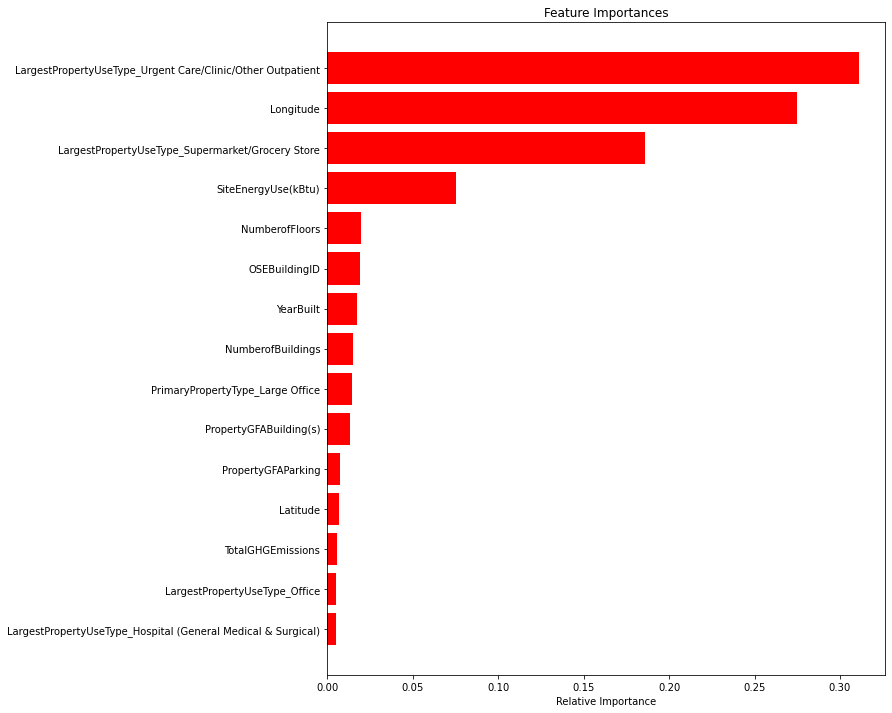

In [16]:
# Feature importance
features = data.columns
importances = RandomForestRegressor_model.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# SHAP

In [17]:
import shap
explainer = shap.Explainer(RandomForestRegressor_model, X_train)

In [18]:
#shap_values = explainer(X_train, check_additivity=False) # a supprimer: , check_additivity=False
shap_values = explainer(X_train[0:1])

In [19]:
np.shape(shap_values.values)

(1, 104)

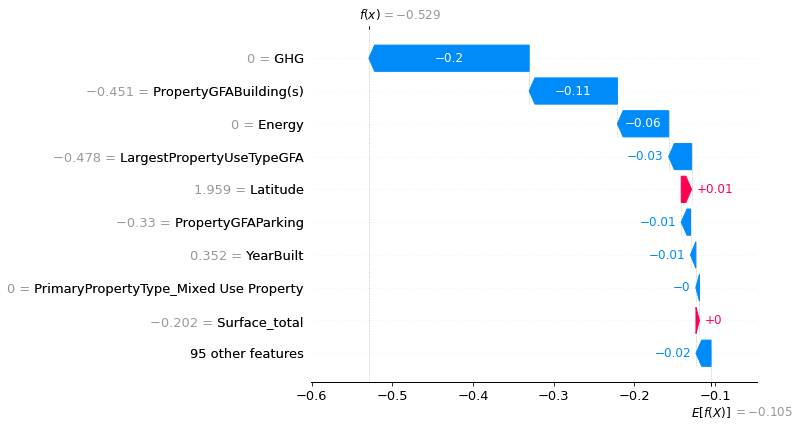

In [20]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

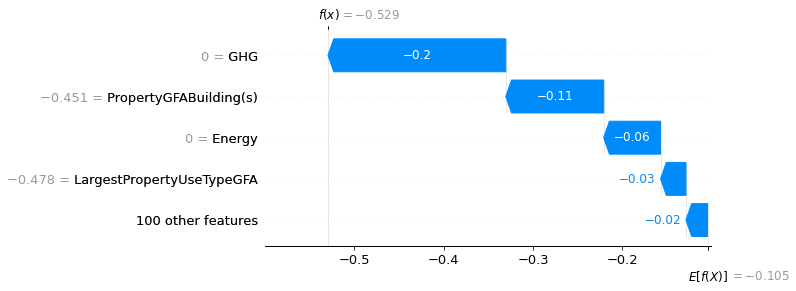

In [21]:
shap.plots.waterfall(shap_values[0], max_display=5)

In [22]:
# Force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [23]:
# Stacked force plot
shap.plots.force(shap_values[0:100])

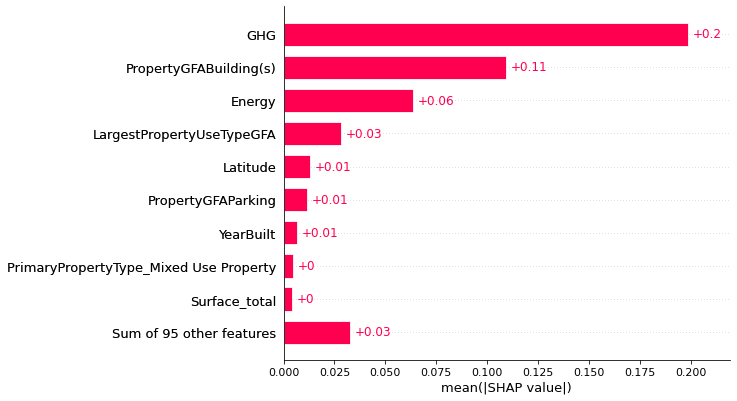

In [24]:
# Absolute mean shap
shap.plots.bar(shap_values)

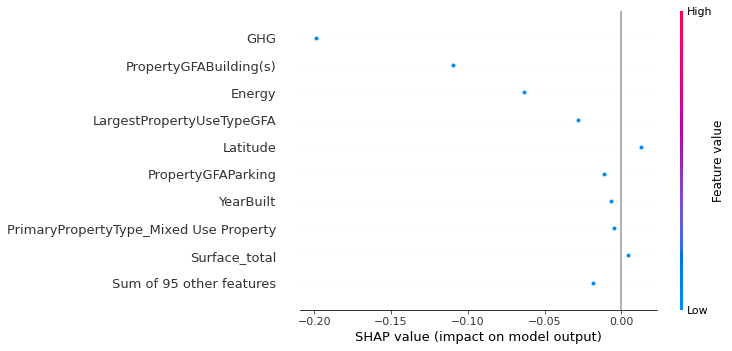

In [25]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

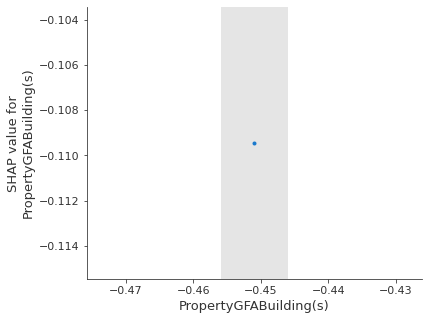

In [26]:
# Dependence plots pour PropertyGFABuilding(s)
shap.plots.scatter(shap_values[:,"PropertyGFABuilding(s)"])

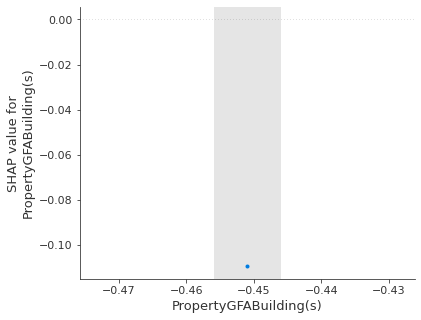

In [27]:
shap.plots.scatter(shap_values[:,"PropertyGFABuilding(s)"],
                  color=shap_values[:,"LargestPropertyUseTypeGFA"])

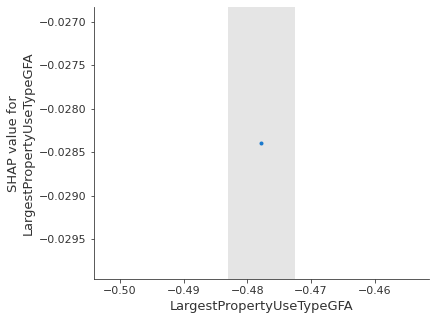

In [28]:
shap.plots.scatter(shap_values[:,"LargestPropertyUseTypeGFA"])

## Energystarscore

In [29]:
# Copie
data_starscore = building.copy()
# Suppression des NAN sur ENERGYSTARScore
data_starscore = data_starscore.loc[data_starscore["ENERGYSTARScore"].notna()]
data_starscore

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),NumberofBuildings,TotalGHGEmissions,LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,...,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility,Energy,GHG
0,1,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,0.153728,-0.032343,0.659251,0.078043,-0.145911,0.044886,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,0.290019,-0.032343,0.891757,0.038137,-0.111143,0.023891,1.929597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,5,-0.123398,-0.201131,-0.329563,0.968955,-1.041999,-0.061489,0.103066,-0.032343,0.843968,-0.159556,-0.284983,-0.062379,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,8,-0.290155,0.207937,1.187954,2.282362,0.594644,-0.069424,0.968752,-0.032343,1.951665,0.384844,0.375610,0.280297,0.394455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
5,10,0.042488,-0.031367,-0.329563,1.133131,-1.041999,-0.066207,-0.018466,-0.032343,0.285052,0.015984,-1.293257,0.009422,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,50045,-0.259241,1.801700,3.738557,1.297307,1.655430,0.121015,0.948340,-0.032343,0.416711,2.301554,1.175276,0.702124,0.423483,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1380,50054,-0.004099,1.972725,4.508354,1.461483,1.625122,0.118442,0.859215,-0.032343,0.634825,2.307381,1.175276,0.846073,0.350158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1381,50062,-0.588401,-0.013552,0.687149,-0.016100,1.625122,0.810072,0.014810,-0.032343,0.056398,0.075616,0.271306,-0.127518,0.478432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1382,50068,0.698630,-0.306467,-0.226225,-0.508628,-0.163061,-1.559914,-0.271077,-0.032343,0.191604,-0.240482,-0.945576,-0.197735,4.003283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [30]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Liste des résultats
resultat_mod = []

###############################################################################################
########################### TotalGHGEmissions avec EnergyStarScore: ###########################
###############################################################################################

# Récupération des valeurs 
X = data_starscore.drop(columns=["OSEBuildingID","SiteEnergyUse(kBtu)", "TotalGHGEmissions"]) # ENERGYSTARScore
y = data_starscore['TotalGHGEmissions'].values
# Découpe du jeu en 70 - 30 %
bins = pd.qcut(data_starscore['TotalGHGEmissions'], 10)
X_train, X_test, y_train, y_test  = \
    model_selection.train_test_split(X, y, test_size=0.3, stratify=bins, random_state=42)
# Standardisation
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
# Paramètres
alpha_lasso = np.logspace(-3, 3, 50)
alpha_rigde = [14.00, 14.001, 14.00292]#np.logspace(np.log10(14), np.log10(14.09), 20) = R:0.3965177623957743
alpha_elast = np.logspace(np.log10(0.0093), np.log10(0.0098), 20)
l1_elast = np.logspace(np.log10(0.10), np.log10(0.101), 5)
reg_alpha = np.logspace(np.log10(0.25), np.log10(0.30), 5)
reg_lambda = np.logspace(np.log10(1.2), np.log10(1.6), 5)
# max_iter = np.logspace(50, 150, 20, int)

# Liste des modèles:
models = [
        ('RandomForestRegressor', RandomForestRegressor(), {'n_estimators': [90], 
                                                        #'max_depth': [8], 
                                                        'min_samples_split': [6,7,8],
                                                        'min_samples_leaf': [1, 2, 4],
                                                        #'max_features': ['sqrt', 'log2', None], 
                                                        'random_state': [42]
                       }),
        
]
# GridSearchCV sur les modèles
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)

    # Prédiction
    y_pred = grid.predict(X_test)

    # Calcul du RMSE (racine de l'erreur quadratique moyenne)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calcul du MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)

    # Calcul du R²
    r2 = r2_score(y_test, y_pred)

    # Ajoute les résultats au dictionnaire
    resultat_mod.append({
        'EnergyStarScore': "Avec",
        'Model': name,
        'RMSE': "{:.2f}".format(rmse),
        'MAE': "{:.2f}".format(mae),
        'R²': "{:.2f}".format(r2)
    })
    
###############################################################################################
########################### TotalGHGEmissions sans EnergyStarScore: ###########################
###############################################################################################

# Récupération des valeurs 
X = data_starscore.drop(columns=["OSEBuildingID","SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore"])
y = data_starscore['TotalGHGEmissions'].values
# Découpe du jeu en 70 - 30 %
bins = pd.qcut(data_starscore['TotalGHGEmissions'], 10)
X_train, X_test, y_train, y_test  = \
    model_selection.train_test_split(X, y, test_size=0.3, stratify=bins, random_state=42)
# Standardisation
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
# Paramètres
alpha_lasso = np.logspace(-3, 3, 50)
alpha_rigde = [14.00, 14.001, 14.00292]#np.logspace(np.log10(14), np.log10(14.09), 20) = R:0.3965177623957743
alpha_elast = np.logspace(np.log10(0.0093), np.log10(0.0098), 20)
l1_elast = np.logspace(np.log10(0.10), np.log10(0.101), 5)
reg_alpha = np.logspace(np.log10(0.25), np.log10(0.30), 5)
reg_lambda = np.logspace(np.log10(1.2), np.log10(1.6), 5)
# max_iter = np.logspace(50, 150, 20, int)

# Liste des modèles:
models = [
        ('RandomForestRegressor', RandomForestRegressor(), {'n_estimators': [90], 
                                                        #'max_depth': [8], 
                                                        'min_samples_split': [6,7,8],
                                                        'min_samples_leaf': [1, 2, 4],
                                                        #'max_features': ['sqrt', 'log2', None], 
                                                        'random_state': [42]
                       }),
]
# GridSearchCV sur les modèles
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)

    # Prédiction
    y_pred = grid.predict(X_test)

    # Calcul du RMSE (racine de l'erreur quadratique moyenne)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calcul du MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)

    # Calcul du R²
    r2 = r2_score(y_test, y_pred)

    # Ajoute les résultats au dictionnaire
    resultat_mod.append({
        'EnergyStarScore': "Sans",
        'Model': name,
        'RMSE': "{:.2f}".format(rmse),
        'MAE': "{:.2f}".format(mae),
        'R²': "{:.2f}".format(r2)
    })
    
# Transformation de la liste en DataFrame
comparateur_model = pd.DataFrame(resultat_mod)
print("\n Pour TotalGHGEmissions:"),
comparateur_model


 Pour TotalGHGEmissions:


,EnergyStarScore,Model,RMSE,MAE,R²
0,Avec,RandomForestRegressor,0.51,0.25,0.76
1,Sans,RandomForestRegressor,0.51,0.25,0.75
